# California Housing Price Prediction

## Objective
The goal of this project is to build a regression model to predict median house prices in California districts using housing-related features.

1. Import Required Libraries

In [1]:
import pandas as pd

2. Load the California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

separate it into features (X) and target variable (y).

In [3]:
X = data.data
y = data.target

3. Dataset Exploration and Understanding

In [4]:
# Dataset Overview
print("Feature Names:", data.feature_names)
print("Dataset Shape:", X.shape)
print("\nFirst 5 rows:")
display(X.head())

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset Shape: (20640, 8)

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


4. Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

5. Feature Scaling (Standardization)

In [ ]:
# Standardize features to ensure equal contribution during model training and improve numerical stability.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Model Training (Linear Regression)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


7. Model Coefficients Interpretation

In [8]:
w = model.coef_
coef_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": w
})
print(coef_df.sort_values(by="Coefficient", key=abs, ascending=False))

b = model.intercept_
print(f"Intercept: {b}")

      Feature  Coefficient
6    Latitude    -0.896929
7   Longitude    -0.869842
0      MedInc     0.854383
3   AveBedrms     0.339259
2    AveRooms    -0.294410
1    HouseAge     0.122546
5    AveOccup    -0.040829
4  Population    -0.002308
Intercept: 2.071946937378881


8. Model Prediction on Test Data

In [9]:
y_pred = model.predict(X_test)

9. Model Evaluation Metrics

In [10]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"r2 Score: {r2}")

MSE: 0.5558915986952444
RMSE: 0.7455813830127764
r2 Score: 0.5757877060324508


10. Actual vs Predicted Visualization

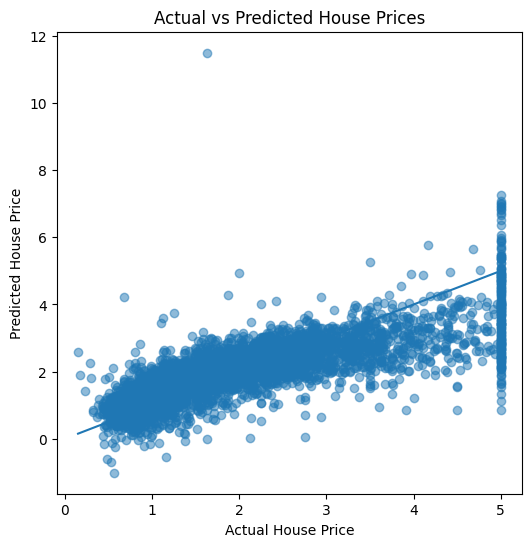

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

11. Residual Analysis

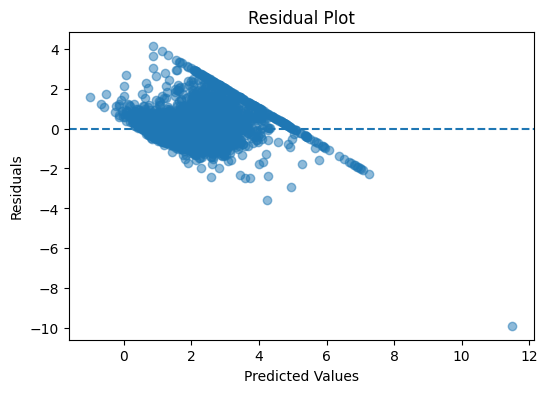

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

12. Actual vs Predicted Comparison Table

In [13]:
comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
comparison

,Actual,Predicted
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657
...,...,...
4123,2.63300,1.991746
4124,2.66800,2.249839
4125,5.00001,4.468770
4126,0.72300,1.187511


## Conclusion

In this project, I built a regression model to predict median house prices using the California Housing dataset.

Key steps performed:
- Explored and understood the dataset structure.
- Split data into training and testing sets.
- Applied feature scaling to standardize inputs.
- Trained a Linear Regression model.
- Evaluated performance using MSE, RMSE, and R² score.
- Visualized predictions and analyzed residuals.

The model demonstrates strong predictive capability, as indicated by the R² score, showing that a significant portion of variance in house prices is explained by the selected features.

Residual analysis suggests that the model captures the general trend effectively, though some variability remains due to real-world complexity.

This project demonstrates practical understanding of regression modeling, feature scaling, performance evaluation, and interpretation of model coefficients using a real-world dataset.